In [54]:
import matplotlib.pyplot as plt
import tensorflow.keras
import pandas as pd


from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#loading the data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

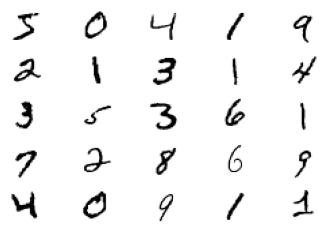

In [3]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [4]:
#60.000 images of numbers each of them with a 28*28 matrix that represents the pixels
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
## Reshaping your data_frame
xtrain=pd.DataFrame(xtrain.reshape(60000,784))

In [7]:
xtest=pd.DataFrame(xtest.reshape(10000,784))

In [8]:
ytrain=to_categorical(ytrain, num_classes=10)

In [9]:
ytrain.shape

(60000, 10)

In [10]:
ytest=to_categorical(ytest, num_classes=10)

In [11]:
ytest.shape

(10000, 10)

In [12]:
m = Sequential([
    Dense(100,input_shape=(784,)),    
    Activation('relu'),
    Dense(10),
    Activation('softmax')    
])

In [13]:
m.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
print(m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history=m.fit(xtrain,ytrain,epochs=20,batch_size=500,verbose=1,validation_split=0.2,)

Epoch 1/20
96/96 [==============================] - 0s 4ms/step - loss: 1.2332 - accuracy: 0.5710 - val_loss: 0.5090 - val_accuracy: 0.8175
Epoch 2/20
96/96 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8638 - val_loss: 0.2775 - val_accuracy: 0.9009
Epoch 3/20
96/96 [==============================] - 0s 3ms/step - loss: 0.2841 - accuracy: 0.8978 - val_loss: 0.2551 - val_accuracy: 0.9103
Epoch 4/20
96/96 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9118 - val_loss: 0.2201 - val_accuracy: 0.9208
Epoch 5/20
96/96 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9237 - val_loss: 0.1868 - val_accuracy: 0.9338
Epoch 6/20
96/96 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.9318 - val_loss: 0.1869 - val_accuracy: 0.9338
Epoch 7/20
96/96 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.9355 - val_loss: 0.2024 - val_accuracy: 0.9265
Epoch 8/20
96/96 [==

In [16]:
score = m.evaluate(xtest, ytest, batch_size=500)
print(score)

20/20 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9601
[0.11315874010324478, 0.960099995136261]


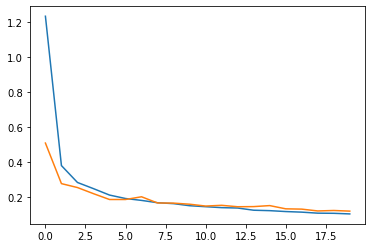

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

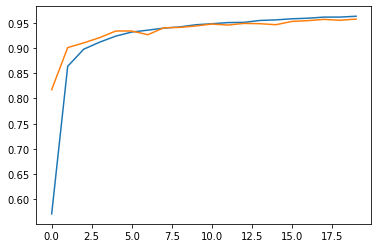

In [21]:
plt.plot(figsize=(20, 20))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

In [39]:
m1 = Sequential([
    Dense(100,input_shape=(784,)),
    Dropout(0.2),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10),
    Activation('softmax')    
])

In [22]:
m2 = Sequential([
    Dense(800, input_shape=(784,)),
    Activation('relu'),
    Dense(400),
    Activation('relu'),
    Dense(200),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [58]:
##REGULARIZE A MNIST MODEL
m3 = Sequential([
    Dense(50, input_shape=(784,)),
    Activation('relu'),
    Dense(25),
    Activation('relu'),
    Dense(25),
    Activation('relu'),
    Dense(25),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [55]:
def mod(m):
    K.clear_session()
    callback = EarlyStopping(monitor='val_loss', patience=3)
    m.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    history=m.fit(xtrain,ytrain,epochs=100,batch_size=500,verbose=1,callbacks=[callback],validation_split=0.2,)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')

Epoch 1/100
96/96 [==============================] - 1s 7ms/step - loss: 0.0812 - accuracy: 0.9724 - val_loss: 0.1405 - val_accuracy: 0.9732
Epoch 2/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0800 - accuracy: 0.9731 - val_loss: 0.1414 - val_accuracy: 0.9733
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0800 - accuracy: 0.9736 - val_loss: 0.1367 - val_accuracy: 0.9731
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.9736 - val_loss: 0.1413 - val_accuracy: 0.9727
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0772 - accuracy: 0.9744 - val_loss: 0.1369 - val_accuracy: 0.9732
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0818 - accuracy: 0.9729 - val_loss: 0.1381 - val_accuracy: 0.9736


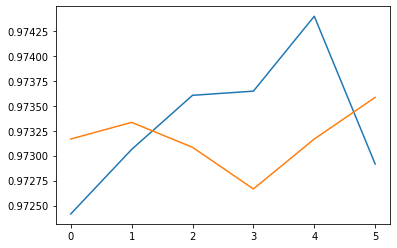

In [56]:
mod(m1)

In [62]:
def mod2(m):
    K.clear_session()
    m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    history=m.fit(xtrain,ytrain,epochs=100,batch_size=500,verbose=1,validation_split=0.2,)
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')


Epoch 1/100
96/96 [==============================] - 2s 25ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.4431 - val_accuracy: 0.9757
Epoch 2/100
96/96 [==============================] - 2s 26ms/step - loss: 0.0279 - accuracy: 0.9960 - val_loss: 0.2016 - val_accuracy: 0.9786
Epoch 3/100
96/96 [==============================] - 2s 23ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 0.2092 - val_accuracy: 0.9780
Epoch 4/100
96/96 [==============================] - 2s 23ms/step - loss: 0.0094 - accuracy: 0.9985 - val_loss: 0.1730 - val_accuracy: 0.9803
Epoch 5/100
96/96 [==============================] - 2s 23ms/step - loss: 0.0126 - accuracy: 0.9977 - val_loss: 0.1777 - val_accuracy: 0.9784
Epoch 6/100
96/96 [==============================] - 2s 23ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.1811 - val_accuracy: 0.9803
Epoch 7/100
96/96 [==============================] - 2s 23ms/step - loss: 0.0082 - accuracy: 0.9984 - val_loss: 0.1974 - val_accuracy: 0.9792
Epoch 

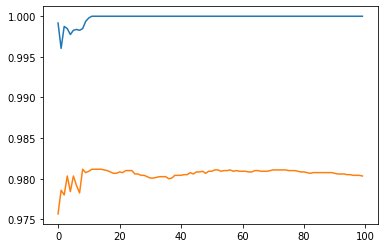

In [63]:
mod2(m2)